# Importing Libraries

In [9]:
import warnings
warnings.filterwarnings("ignore")

import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler

# Data Preprocessing

In [10]:
data=pd.read_csv("Iris.csv")
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [11]:
e=LabelEncoder()
y[:]=e.fit_transform(y[:])
y=y.reshape(-1,1)
ohe=OneHotEncoder()
y=ohe.fit_transform(y[:]).toarray()

In [12]:
sc=StandardScaler()
x=sc.fit_transform(x)

# Neural Network

In [13]:
def deepl():
    model=Sequential()
    s=x.shape[1]
    s1=y.shape[1]
    model.add(Dense(s,input_dim=s,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(s1,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [14]:
model=deepl()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [15]:
pm=model.fit(x,y,batch_size=1,epochs=5,verbose=1,validation_split=0.1)

Train on 135 samples, validate on 15 samples
Epoch 1/5
135/135 [==============================] - 0s 2ms/step - loss: 1.1417 - accuracy: 0.4148 - val_loss: 0.7300 - val_accuracy: 0.9333
Epoch 2/5
135/135 [==============================] - 0s 811us/step - loss: 0.9382 - accuracy: 0.6074 - val_loss: 0.5189 - val_accuracy: 1.0000
Epoch 3/5
135/135 [==============================] - 0s 862us/step - loss: 0.7686 - accuracy: 0.8444 - val_loss: 0.3372 - val_accuracy: 1.0000
Epoch 4/5
135/135 [==============================] - 0s 730us/step - loss: 0.5592 - accuracy: 0.8741 - val_loss: 0.2260 - val_accuracy: 1.0000
Epoch 5/5
135/135 [==============================] - 0s 765us/step - loss: 0.3884 - accuracy: 0.9037 - val_loss: 0.1850 - val_accuracy: 1.0000


# Model Performance

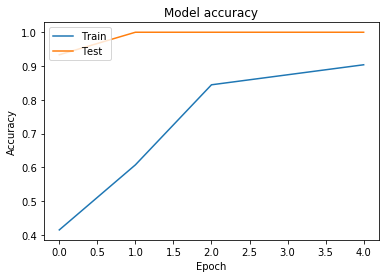

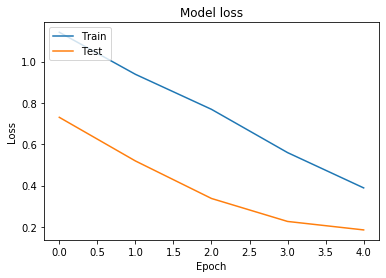

In [16]:
plt.plot(pm.history['accuracy'])
plt.plot(pm.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('resources/accuracy.jpg')
plt.show()

plt.plot(pm.history['loss'])
plt.plot(pm.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('resources/loss.jpg')
plt.show()